<a href="https://colab.research.google.com/github/elizabethts/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/LS_DS_111_A_First_Look_at_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

In [0]:
# TODO - we'll be doing this live, taking requests
# and reproducing what it is to look up and learn things

## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

In [0]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

--2019-05-30 20:44:24--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

PREFIX=/usr/local
reinstalling: python-3.7.3-h0371630_0 ...
using -f (force) option
Python 3.7.3
reinstalling: ca-certificates-2019.1.23-0 ...
using -f (force) option
reinstalling: libgcc-ng-8.2.0-hdf63c60_1 ...
using -f (force) option
reinstalling: libstdcxx-ng-8.2.0-hdf63c60_1 ...
using -f (force) option
reinstalling: libffi-3.2.1-hd88cf55_4 ...
using -f (force) option
reinstalling: ncurses-6.1-he6710b0_1 ...
using -f (force) option
reinstalling: openssl-1.1.1b-h7b6447c_1 ...
using -f (force) option
reinstalling: xz-5.2.4-h14c3975_4 ...
using -f (force) option
reinstalli

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [0]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

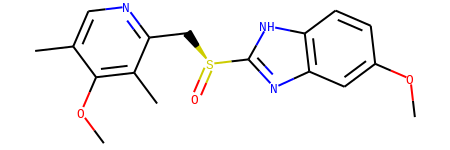

In [0]:
m = Chem.MolFromSmiles('COC1=CC2=C(NC(=N2)[S@@](=O)CC2=NC=C(C)C(OC)=C2C)C=C1')
m

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

I first uploaded some tools to visualize chemical structures in my notebook. Then I created a variable that contains the chemical structure that I want to view. And finally I looked at the variable by just typing the variable name to actually view it.

2.  What was the most challenging part of what you did?

Figuring out how to import the rdkit library

3.  What was the most interesting thing you learned?

You can visualize chemical structures in python

4.  What area would you like to explore with more time?

Visualizations proteins in python and analyzing chemical structures and bonds



## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about.